# Upper Confidence Bound (UCB)

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [7]:
#No. of users we will display the ads
N = 10000

#No. of Ads we have
d=10

#Full list of ads that are selected, over the rounds it will get bigger and 
# bigger until it is 10000 elements
ads_selected = []

#Number of times Ad i was selected upto round n = Ni
numbers_of_selections = [0] * d 

#Sum of rewards of Ad i upto round n = Ri
Sums_of_rewards = [0] * d

#Total rewards accumulated over the rounds
total_reward = 0

for n in range(0,N):
  ad=0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selections[i] > 0:
      avg_reward=Sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt((3/2)*(math.log(n+1)/numbers_of_selections[i]))
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound = upper_bound
      ad=i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = df.values[n,ad]
  Sums_of_rewards[ad] = Sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

Text(0.5, 1.0, 'Histogram of Ad selected')

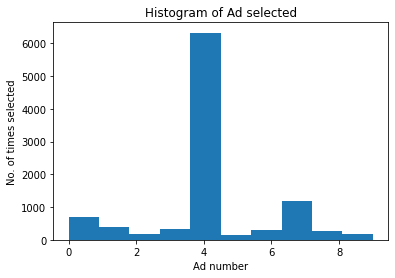

In [9]:
plt.hist(ads_selected)
plt.xlabel('Ad number')
plt.ylabel('No. of times selected')
plt.title('Histogram of Ad selected')

Here we see that UCB is able to identify the ad. But our goal is to find this ad in minimum rounds. Hence we will now reduce No. of users we will display the ads (N = 10000) to 5000 then 1000 then 500. We see that UCB is able to find the ad in with N=1000


In [10]:
#No. of users we will display the ads
N = 1000

#No. of Ads we have
d=10

#Full list of ads that are selected, over the rounds it will get bigger and 
# bigger until it is 10000 elements
ads_selected = []

#Number of times Ad i was selected upto round n = Ni
numbers_of_selections = [0] * d 

#Sum of rewards of Ad i upto round n = Ri
Sums_of_rewards = [0] * d

#Total rewards accumulated over the rounds
total_reward = 0

for n in range(0,N):
  ad=0
  max_upper_bound = 0
  for i in range(0,d):
    if numbers_of_selections[i] > 0:
      avg_reward=Sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt((3/2)*(math.log(n+1)/numbers_of_selections[i]))
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound = upper_bound
      ad=i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = df.values[n,ad]
  Sums_of_rewards[ad] = Sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

Text(0.5, 1.0, 'Histogram of Ad selected')

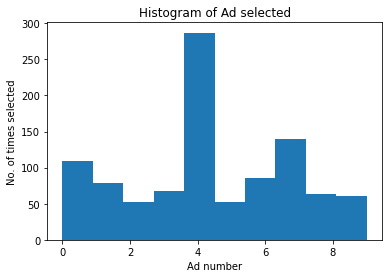

In [11]:
plt.hist(ads_selected)
plt.xlabel('Ad number')
plt.ylabel('No. of times selected')
plt.title('Histogram of Ad selected')

This is a very powerful technique to determine the best case out of multiple cases with least trials. Rather than performing exploration by simply selecting an arbitrary action, chosen with a probability that remains constant, the UCB algorithm changes its exploration-exploitation balance as it gathers more knowledge of the environment. It moves from being primarily focused on exploration, when actions that have been tried the least are preferred, to instead concentrate on exploitation, selecting the action with the highest estimated reward.